In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Influencer.xlsx')
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [4]:
df.isnull().sum()

Rank                    0
Channel Info            0
Influence Score         0
Followers               0
Avg. Likes              0
Posts                   0
60-Day Eng Rate         0
New Post Avg. Likes     0
Total Likes             0
Country Or Region      63
dtype: int64

In [5]:
df["Country Or Region"].fillna("Other",inplace=True)

### Data Preprocessing

#### Removing '\n' from Channel Info column:

In [6]:
df["Channel Info"]=df["Channel Info"].astype("str")
df["Channel Info"]=df["Channel Info"].apply(lambda x: x.strip("\n"))
df.head()

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,leomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,Other
3,4,selenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,therock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


#### Removing abbreviation for b-billion,m-million,k-thousand and multiplying the columns with actual values where ever applicable

#### Followers column:

In [7]:
follow = list(df['Followers'])
new_follow = []

for num in follow:
    if 'm' in num:
        new_num = 1000000*float(num.replace('m',''))
        new_follow.append(new_num)
    else:
        new_follow.append(float(new_num))
df['Followers']=new_follow

#### Avg. Likes column:

In [8]:
avglikes = list(df['Avg. Likes'])
new_avglikes = []

for num in avglikes:
    if 'm' in num:
        new_num = 1000000*float(num.replace('m',''))
        new_avglikes.append(new_num)
    else:
        new_num = 1000*float(num.replace('k',''))
        new_avglikes.append(new_num)
df['Avg. Likes']=new_avglikes

#### Posts column:

In [9]:
post = list(df['Posts'].astype("str"))   #change type to string as int values are present
new_post = []

for num in post:
    if 'k' in num:
        new_num = 1000*float(num.replace('k',''))
        new_post.append(new_num)
    else:
        new_post.append(float(num))
df['Posts']=new_post

#### New Post Avg. Likes column:

In [10]:
post_avg_likes = list(df['New Post Avg. Likes'].astype("str"))
new_post_avg_likes = []

for num in post_avg_likes:
    if 'm' in num:
        new_num = 1000000*float(num.replace('m',''))
        new_post_avg_likes.append(new_num)
    else:
        new_num = 1000*float(num.replace('k',''))
        new_post_avg_likes.append(new_num)
df['New Post Avg. Likes']=new_post_avg_likes

#### Total Likes column:

In [11]:
total_likes = list(df['Total Likes'])
new_total_likes = []

for num in total_likes:
    if 'b' in num:
        new_num = 1000000000*float(num.replace('b',''))
        new_total_likes.append(new_num)
    else:
        new_num = 1000000*float(num.replace('m',''))
        new_total_likes.append(new_num)
df['Total Likes']=new_total_likes

#### Cleaned data

In [12]:
df

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,cristiano,92,485200000.0,8700000.0,3400.0,0.013,6300000.0,2.910000e+10,Spain
1,2,kyliejenner,91,370700000.0,8200000.0,7000.0,0.014,5000000.0,5.740000e+10,United States
2,3,leomessi,90,363900000.0,6700000.0,915.0,0.010,3500000.0,6.100000e+09,Other
3,4,selenagomez,93,348800000.0,6100000.0,1900.0,0.005,1700000.0,1.140000e+10,United States
4,5,therock,91,339400000.0,1800000.0,6800.0,0.003,932000.0,1.260000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,khabib_nurmagomedov,63,33600000.0,680600.0,4600.0,0.009,305700.0,3.100000e+09,Russia
196,197,danbilzerian,84,33600000.0,2200000.0,1400.0,0.064,2100000.0,3.000000e+09,Canada
197,198,raisa6690,80,33600000.0,227800.0,4200.0,0.003,103200.0,9.559000e+08,Indonesia
198,199,luansantana,79,33500000.0,193300.0,865.0,0.003,82600.0,1.672000e+08,Brazil


### 1. Are there any correlated features in the given dataset? If yes, state the correlation coefficient of the pair of features which are highly correlated.

In [13]:
matrix = df.corr()

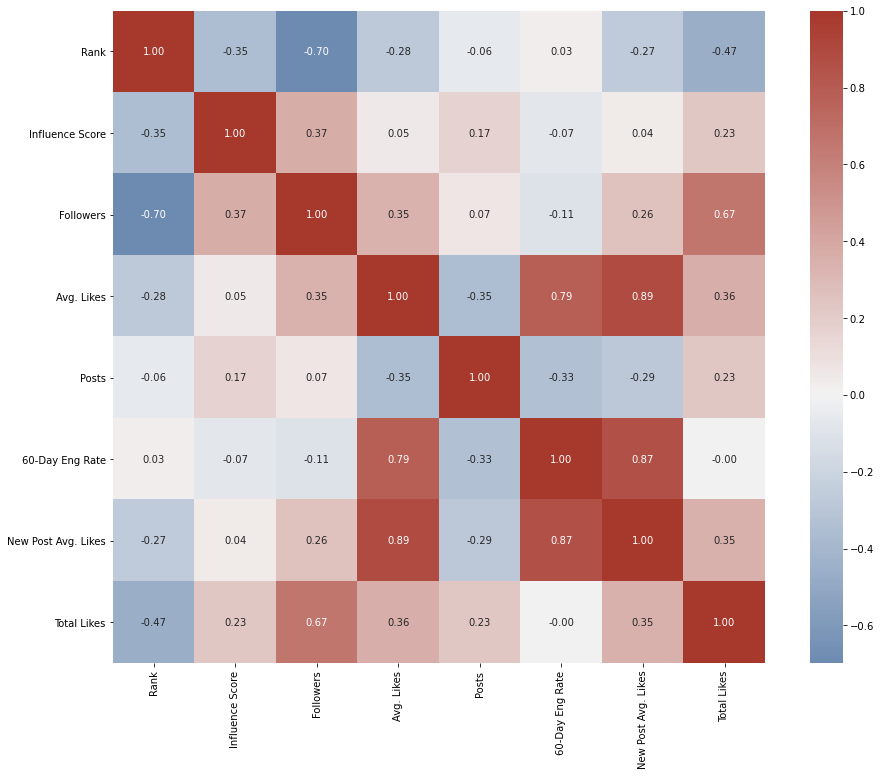

In [14]:
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, 
                fmt='.2f', square=True, cmap=cmap)

In [18]:
unstack_matrix = matrix.unstack()
sorted_pairs = unstack_matrix.sort_values(kind="quicksort")
strong_pairs = sorted_pairs[(sorted_pairs) > 0.6]
strong_pairs.head(9)

Total Likes          Followers              0.667546
Followers            Total Likes            0.667546
Avg. Likes           60-Day Eng Rate        0.789359
60-Day Eng Rate      Avg. Likes             0.789359
                     New Post Avg. Likes    0.866293
New Post Avg. Likes  60-Day Eng Rate        0.866293
Avg. Likes           New Post Avg. Likes    0.892784
New Post Avg. Likes  Avg. Likes             0.892784
Rank                 Rank                   1.000000
dtype: float64

### 2. What is the frequency distribution of the following features?
- Influence Score
- Followers
- Posts

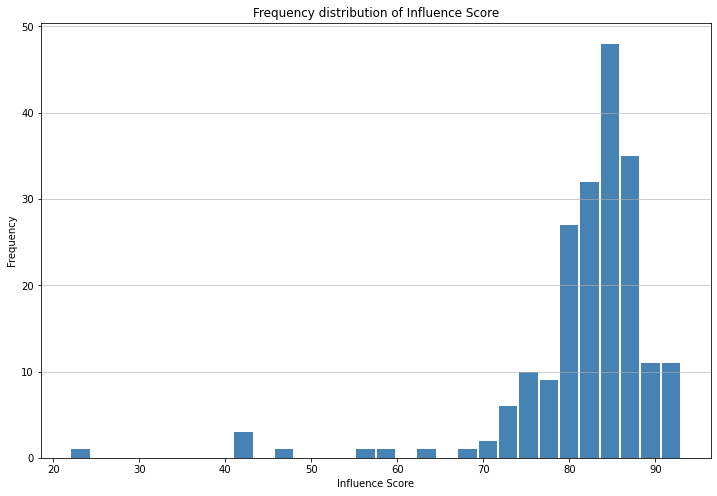

In [19]:
data = df["Influence Score"]

plt.figure(figsize=(12,8))
plt.hist(data, bins=30, rwidth=0.9,color='steelblue')
plt.title('Frequency distribution of Influence Score')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

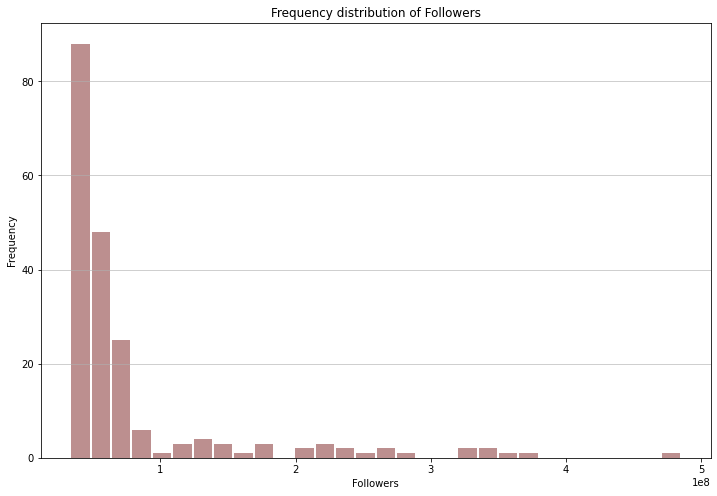

In [20]:
data = df["Followers"]

plt.figure(figsize=(12,8))
plt.hist(data, bins=30, rwidth=0.9,color='rosybrown')
plt.title('Frequency distribution of Followers')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

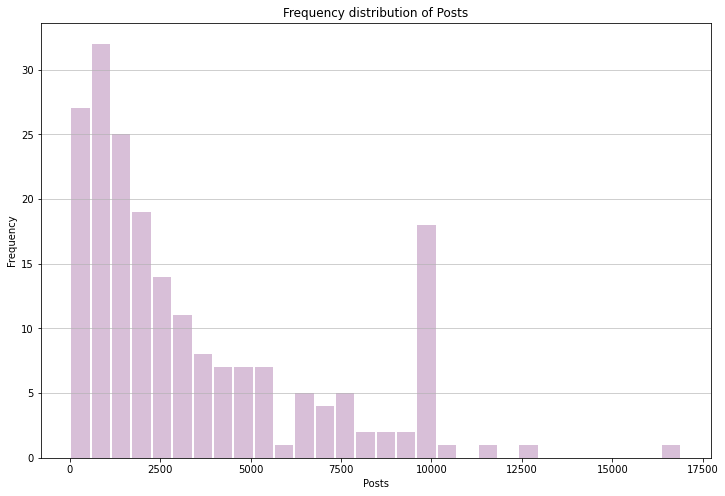

In [21]:
data = df["Posts"]

plt.figure(figsize=(12,8))
plt.hist(data, bins=30, rwidth=0.9,color='thistle')
plt.title('Frequency distribution of Posts')
plt.xlabel('Posts')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

### 3. Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.

In [22]:
data = df["Country Or Region"].value_counts()
data.head(5)

United States    65
Other            63
Brazil           13
India            12
Indonesia         7
Name: Country Or Region, dtype: int64

Text(0, 0.5, 'Count')

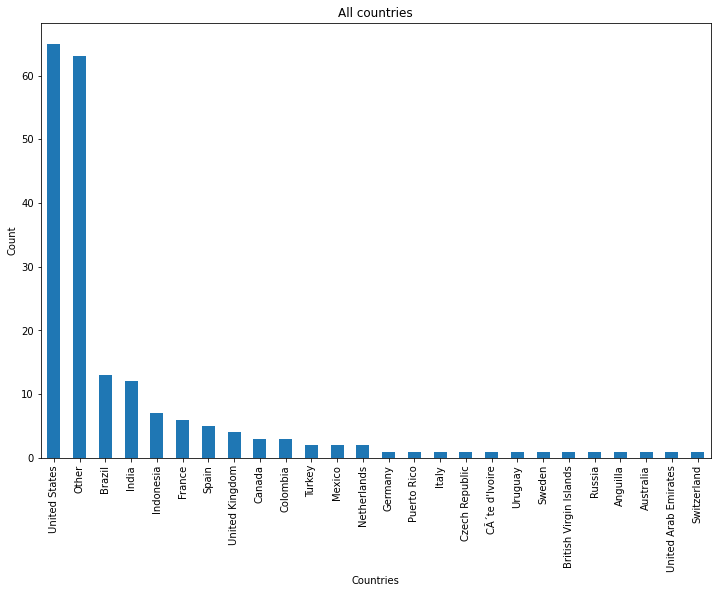

In [23]:
data.plot(kind='bar',figsize=(12,8))
plt.title('All countries')
plt.xlabel('Countries')
plt.ylabel('Count')

### 4. Who are the top 10 influencers in the given dataset based on the following features
- Followers
- Average likes
- Total Likes

In [24]:
top_10 = df.sort_values(["Followers"],ascending=False)[["Channel Info","Followers"]].head(10)
print(top_10.to_string(index=False))

   Channel Info   Followers
      cristiano 485200000.0
    kyliejenner 370700000.0
       leomessi 363900000.0
    selenagomez 348800000.0
        therock 339400000.0
   arianagrande 333000000.0
  kimkardashian 330700000.0
        beyonce 276100000.0
khloekardashian 273900000.0
   justinbieber 260000000.0


In [25]:
top_10 = df.sort_values(["Avg. Likes"],ascending=False)[["Channel Info","Avg. Likes"]].head(10)
print(top_10.to_string(index=False))

Channel Info  Avg. Likes
         thv  15400000.0
         j.m  14400000.0
       rkive  10600000.0
   cristiano   8700000.0
billieeilish   8400000.0
 kyliejenner   8200000.0
    leomessi   6700000.0
 selenagomez   6100000.0
lalalalisa_m   6000000.0
     zendaya   5900000.0


In [26]:
top_10 = df.sort_values(["Total Likes"],ascending=False)[["Channel Info","Total Likes"]].head(10)
print(top_10.to_string(index=False))

 Channel Info  Total Likes
  kyliejenner 5.740000e+10
    cristiano 2.910000e+10
      zendaya 2.080000e+10
kimkardashian 1.980000e+10
 arianagrande 1.850000e+10
   badgalriri 1.800000e+10
     neymarjr 1.440000e+10
 justinbieber 1.400000e+10
   nickiminaj 1.290000e+10
      therock 1.260000e+10


### 5.Describe the relationship between the following pairs of features using a suitable graph
- Followers and Total Likes
- Followers and Influence Score
- Posts and Average likes
- Posts and Influence Score

#### Followers and Total Likes

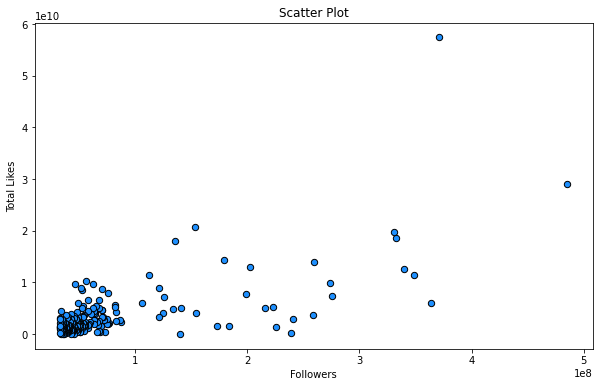

In [27]:
x=df["Followers"]
y=df["Total Likes"]
plt.figure(figsize=(10,6))
plt.scatter(x,y,c="dodgerblue",s=40,edgecolors='black')
plt.title('Scatter Plot')
plt.xlabel("Followers")
plt.ylabel("Total Likes")
plt.show()

- positive linear relationship with few outliers is observed

#### Followers and Influence Score

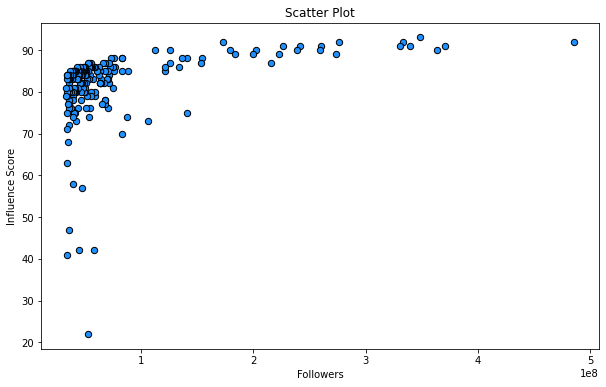

In [28]:
x=df["Followers"]
y=df["Influence Score"]
plt.figure(figsize=(10,6))
plt.scatter(x,y,c="dodgerblue",s=40,edgecolors='black')
plt.title('Scatter Plot')
plt.xlabel("Followers")
plt.ylabel("Influence Score")
plt.show()

- Logarithmic relationship is observed since data value increases rapidly and then flattens out.

#### Posts and Average likes

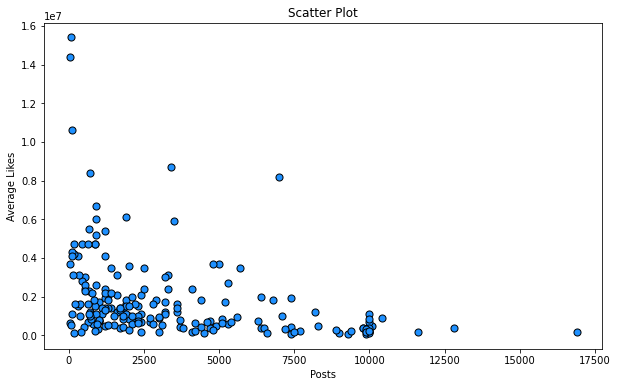

In [29]:
x=df["Posts"]
y=df["Avg. Likes"]
plt.figure(figsize=(10,6))
plt.scatter(x,y,c="dodgerblue",s=50,edgecolors='black')
plt.title('Scatter Plot')
plt.xlabel("Posts")
plt.ylabel("Average Likes")
plt.show()

- Exponential relationship is observed as data value decreases at a decreasing rate.

#### Posts and Influence Score

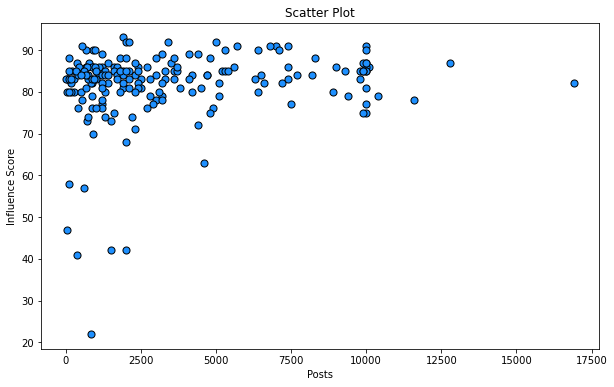

In [30]:
x=df["Posts"]
y=df["Influence Score"]
plt.figure(figsize=(10,6))
plt.scatter(x,y,c="dodgerblue",s=50,edgecolors='black')
plt.title('Scatter Plot')
plt.xlabel("Posts")
plt.ylabel("Influence Score")
plt.show()

- Logarithmic relationship is observed since data value increases rapidly and then flattens out.